In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
df_carrera=pd.read_csv('./data/tabla_carrera.csv')

In [141]:
df_modalidad=pd.read_csv('./data/tabla_modalidad.csv')
df_modalidad

,id_modalidad,Modalidad
0,0,educación básica regular (ebr) y educación bás...
1,1,primeros puestos de educación secundaria
2,2,traslado interno
3,3,graduados o titulados
4,4,traslado externo nacional
5,5,traslado externo internacional
6,6,deportista calificado
7,7,deportistas calificados de alto nivel
8,8,comunidades nativas
9,9,personas con discapacidad


In [175]:
df_resultados=pd.read_csv('./data/tabla_resultados.csv',dtype={'PUNTAJE FINAL':float})
df_resultados

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas/_libs/parsers.pyx", line 1124, in pandas._libs.parsers.TextReader._convert_tokens
TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jhonvelasque/cursos/proyectos-personales/Admision2023/envSimulacro/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1156/941129417.py", line 1, in <module>
    df_resultados=pd.read_csv('./data/tabla_resultados.csv',dtype={'PUNTAJE FINAL':float})
  File "/home/jhonvelasque/cursos/proyectos-personales/Admision2023/envSimulacro/lib/python3.8/site-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/home/jhonvelasque/cursos/proyectos-personales/Admision2023/envSimulacro/lib/python3.8/si

In [176]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25352 entries, 855168 to 294995
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   APELLIDOS Y NOMBRES  25352 non-null  object 
 1   ESCUELA PROFESIONAL  25352 non-null  object 
 2   PUNTAJE FINAL        25352 non-null  object 
 3   MERITO E.P           25352 non-null  float64
 4   OBSERVACIÓN          25352 non-null  object 
 5   IdModalidad          25352 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


In [144]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25352 entries, 855168 to 294995
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   APELLIDOS Y NOMBRES  25352 non-null  object 
 1   ESCUELA PROFESIONAL  25352 non-null  object 
 2   PUNTAJE FINAL        25352 non-null  object 
 3   MERITO E.P           25352 non-null  float64
 4   OBSERVACIÓN          25352 non-null  object 
 5   IdModalidad          25352 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


In [145]:
df_resultados.rename(columns={'OBSERVACI&OacuteN':'OBSERVACIÓN'},inplace=True)

/tmp/ipykernel_1156/3133358354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultados.rename(columns={'OBSERVACI&OacuteN':'OBSERVACIÓN'},inplace=True)


In [146]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25352 entries, 855168 to 294995
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   APELLIDOS Y NOMBRES  25352 non-null  object 
 1   ESCUELA PROFESIONAL  25352 non-null  object 
 2   PUNTAJE FINAL        25352 non-null  object 
 3   MERITO E.P           25352 non-null  float64
 4   OBSERVACIÓN          25352 non-null  object 
 5   IdModalidad          25352 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


In [147]:
df_Ausentes=df_resultados[df_resultados['OBSERVACIÓN']=='AUSENTE']

In [148]:
df_Ausentes.groupby(['IdModalidad'])['APELLIDOS Y NOMBRES'].count().reset_index()

,IdModalidad,APELLIDOS Y NOMBRES


In [149]:
df_Ausentes.groupby(['ESCUELA PROFESIONAL'])['APELLIDOS Y NOMBRES'].count().reset_index().sort_values(by='APELLIDOS Y NOMBRES',ascending=False)

,ESCUELA PROFESIONAL,APELLIDOS Y NOMBRES


In [150]:
lista_carreras=df_resultados['ESCUELA PROFESIONAL'].unique()
#seve que hay datos que nos dan la misma informacion que falta normalizar 

In [151]:
#buscando todas la carreras que se repiten 
administracion=list(filter(lambda x:'ADMINISTRACIÓN' in x ,df_resultados['ESCUELA PROFESIONAL'].unique()))

In [152]:
administracion=administracion[:3:]

In [153]:
df_resultados['ESCUELA PROFESIONAL'] =df_resultados['ESCUELA PROFESIONAL'].replace(administracion,'ADMINISTRACIÓN')

/tmp/ipykernel_1156/2346800936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultados['ESCUELA PROFESIONAL'] =df_resultados['ESCUELA PROFESIONAL'].replace(administracion,'ADMINISTRACIÓN')


In [154]:
administracion_turismo=list(filter(lambda x:'ADMINISTRACIÓN DE TURISMO' in x ,df_resultados['ESCUELA PROFESIONAL'].unique()))

In [155]:
df_resultados['ESCUELA PROFESIONAL'] =df_resultados['ESCUELA PROFESIONAL'].replace(administracion_turismo,'ADMINISTRACIÓN DE TURISMO')

/tmp/ipykernel_1156/3529930030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultados['ESCUELA PROFESIONAL'] =df_resultados['ESCUELA PROFESIONAL'].replace(administracion_turismo,'ADMINISTRACIÓN DE TURISMO')


In [156]:
administracion_Internacionales=list(filter(lambda x:'ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES' in x ,df_resultados['ESCUELA PROFESIONAL'].unique()))

In [157]:
df_resultados['ESCUELA PROFESIONAL'] =df_resultados['ESCUELA PROFESIONAL'].replace(administracion_Internacionales,'ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES')

/tmp/ipykernel_1156/1330852710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultados['ESCUELA PROFESIONAL'] =df_resultados['ESCUELA PROFESIONAL'].replace(administracion_Internacionales,'ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES')


In [158]:
#IMPOTANDO VALORES CATEGORICOS 
df_resultados['OBSERVACIÓN'].fillna('NO INGRESO',inplace=True)

/tmp/ipykernel_1156/3648245003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultados['OBSERVACIÓN'].fillna('NO INGRESO',inplace=True)


In [159]:
#eliminando los Ausentes
df_resultados=df_resultados[df_resultados['OBSERVACIÓN']!='AUSENTE']

In [160]:
df_resultados[(df_resultados['IdModalidad'] == 0) & (df_resultados['ESCUELA PROFESIONAL'] == 'MEDICINA HUMANA')].sort_values(by='PUNTAJE FINAL')

,APELLIDOS Y NOMBRES,ESCUELA PROFESIONAL,PUNTAJE FINAL,MERITO E.P,OBSERVACIÓN,IdModalidad
CODIGO,,,,,,
854055,"RAMIREZ REYNAGA, KAORI AREZBI",MEDICINA HUMANA,1000.625,0.0,NO INGRESO,0
856013,"CÁCERES SÁNCHEZ, GERALDINE LILIBETH CHANTAL",MEDICINA HUMANA,1000.625,0.0,NO INGRESO,0
846922,"SOLÍS LÓPEZ, GIANELLA ARACELLY",MEDICINA HUMANA,1001.75,0.0,NO INGRESO,0
871967,"ÑAHUE TELLO, GIANCARLO GINO MARTIN",MEDICINA HUMANA,1001.75,0.0,NO INGRESO,0
893799,"RADO ARRIOLA, TOMAS SEBASTIAN",MEDICINA HUMANA,1001.75,0.0,NO INGRESO,0
...,...,...,...,...,...,...
867512,"CRUZ VALQUI, ALVARO TOM",MEDICINA HUMANA,995.25,0.0,NO INGRESO,0
882243,"ROMERO ACOSTA, MICHAEL DENIS",MEDICINA HUMANA,996.125,0.0,NO INGRESO,0
886580,"VERONA MAURICIO, GLADYS LUCERO",MEDICINA HUMANA,996.375,0.0,NO INGRESO,0


In [161]:
#falta modificar el tipodedato apra Puntaje final 
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25352 entries, 855168 to 294995
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   APELLIDOS Y NOMBRES  25352 non-null  object 
 1   ESCUELA PROFESIONAL  25352 non-null  object 
 2   PUNTAJE FINAL        25352 non-null  object 
 3   MERITO E.P           25352 non-null  float64
 4   OBSERVACIÓN          25352 non-null  object 
 5   IdModalidad          25352 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


In [162]:
carreras={
    "D": [
        "Administración",
        "Administración de Turismo",
        "Administración de Negocios Internacionales",
        "Contabilidad",
        "Gestión Tributaria",
        "Auditoría Empresarial y del Sector Público",
        "Presupuesto y Finanzas Públicas",
        "Economía",
        "Economía Pública",
        "Economía Internacional"
    ],
    "A": [
        "Medicina Humana",
        "Obstetricia",
        "Enfermería",
        "Laboratorio Clínico",
        "Terapia Física y Rehabilitación",
        "Radiología",
        "Terapia Ocupacional",
        "Nutrición",
        "Farmacia y Bioquímica",
        "Ciencias de los Alimentos",
        "Toxicología",
        "Odontología",
        "Medicina Veterinaria",
        "Psicología",
        "Psicología Organizacional y de la Gestión Humana"
    ],
    "B": [
        "Química",
        "Ciencias Biológicas",
        "Genética y Biotecnología",
        "Microbiología y Parasitología",
        "Física",
        "Matemática",
        "Estadística",
        "Investigación Operativa",
        "Computación Científica"
    ],
    "C": [
        "Ingeniería Química",
        "Ingeniería Agroindustrial",
        "Ingeniería Mecánica de Fluidos",
        "Ingeniería Geológica",
        "Ingeniería Geográfica",
        "Ingeniería de Minas",
        "Ingeniería Metalúrgica",
        "Ingeniería Civil",
        "Ingeniería Ambiental",
        "Ingeniería Industrial",
        "Ingeniería Textil y Confecciones",
        "Ingeniería de Seguridad y Salud en el Trabajo",
        "Ingeniería Electrónica",
        "Ingeniería Eléctrica",
        "Ingeniería de Telecomunicaciones",
        "Ingeniería Biomédica",
        "Ingeniería de Sistemas",
        "Ingeniería de Software"
    ],
    "E": ['Derecho', 
            'Ciencia Política', 
            'Literatura', 
            'Filosofía', 
            'Lingüística', 
            'Comunicación Social', 
            'Arte', 'Bibliotecología y Ciencias de la Información',
            'Danza', 'Conservación y Restauración',
            'Educación Inicial', 'Educación Primaria', 
            'Educación Secundaria', 'Educación Física',
            'Historia', 'Sociología', 'Antropología',
            'Arqueología', 'Trabajo Social',
            'Geografía']

}

In [163]:
df_resultados.columns

Index(['APELLIDOS Y NOMBRES', 'ESCUELA PROFESIONAL', 'PUNTAJE FINAL',
       'MERITO E.P', 'OBSERVACIÓN', 'IdModalidad'],
      dtype='object')

In [164]:
df_resultados[(df_resultados['ESCUELA PROFESIONAL']=='MEDICINA HUMANA')& (df_resultados['IdModalidad']==0)].sort_values(by='MERITO E.P',ascending=False)

,APELLIDOS Y NOMBRES,ESCUELA PROFESIONAL,PUNTAJE FINAL,MERITO E.P,OBSERVACIÓN,IdModalidad
CODIGO,,,,,,
883650,"RUBIO ROJAS, ANDREA REGINA",MEDICINA HUMANA,1120.625,106.0,ALCANZO VACANTE,0
880681,"LEVANO APARCANA, JOSE EDUARDO",MEDICINA HUMANA,1121.75,105.0,ALCANZO VACANTE,0
864799,"ANDAZABAL REBAZA, JOSE MANUEL",MEDICINA HUMANA,1121.75,104.0,ALCANZO VACANTE,0
897354,"LEON HERRERA, JHUNIOR ANDERSON",MEDICINA HUMANA,1124.0,103.0,ALCANZO VACANTE,0
849640,"PACHECO HUAMAN, BONNY DAANA",MEDICINA HUMANA,1127.375,102.0,ALCANZO VACANTE,0
...,...,...,...,...,...,...
884340,"FRANCISCO CEFERINO, LUZ MILAGROS",MEDICINA HUMANA,398.125,0.0,NO INGRESO,0
889180,"FRANCISCO COLLANTES, TAMARA PAMELA",MEDICINA HUMANA,649.625,0.0,NO INGRESO,0
847015,"FRETEL DIEGO, TAYCI SAMARHA",MEDICINA HUMANA,643.75,0.0,NO INGRESO,0


In [165]:
# imputando los valores faltantes

In [166]:
df_resultados['MERITO E.P'].fillna(0,inplace=True)

In [167]:
#todos los primeros puestos de medicina humana
df_resultados[(df_resultados['MERITO E.P']==1)
            & (df_resultados['ESCUELA PROFESIONAL']=='MEDICINA HUMANA')]


,APELLIDOS Y NOMBRES,ESCUELA PROFESIONAL,PUNTAJE FINAL,MERITO E.P,OBSERVACIÓN,IdModalidad
CODIGO,,,,,,
894014,"HURTADO SEVILLANO, RAPHAEL OSWALDO",MEDICINA HUMANA,1477.5,1.0,ALCANZO VACANTE,0
851901,"REYES ARRUNÁTEGUI, FERNANDO NICOLÁS",MEDICINA HUMANA,1369.625,1.0,ALCANZO VACANTE,1
878534,"NEYRA GARCÍA, JOSÉ ALBERTO",MEDICINA HUMANA,1200.875,1.0,ALCANZO VACANTE,2
852198,"SUÁREZ TORRES, JOSÉ ANTONIO",MEDICINA HUMANA,1156.375,1.0,ALCANZO VACANTE,3
883548,"GONZALES CHOQUE, JOSE MANUEL",MEDICINA HUMANA,1008.5,1.0,ALCANZO VACANTE,4
885018,"ASPARRIN PAREDES, JIMENA THAIS",MEDICINA HUMANA,818.375,1.0,ALCANZO VACANTE,6
855869,"CORPUNA MONTES, PILAR",MEDICINA HUMANA,409.625,1.0,ALCANZO VACANTE,7
859528,"COPARI RODRIGUEZ, MILTHON ALDAIR",MEDICINA HUMANA,640.625,1.0,ALCANZO VACANTE,8
847076,"CUYA TINCO, BILL TAYLOR",MEDICINA HUMANA,883.75,1.0,ALCANZO VACANTE,9


In [168]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25352 entries, 855168 to 294995
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   APELLIDOS Y NOMBRES  25352 non-null  object 
 1   ESCUELA PROFESIONAL  25352 non-null  object 
 2   PUNTAJE FINAL        25352 non-null  object 
 3   MERITO E.P           25352 non-null  float64
 4   OBSERVACIÓN          25352 non-null  object 
 5   IdModalidad          25352 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


In [169]:
df_resultados['PUNTAJE FINAL']

CODIGO
855168     774.75
860373      299.0
894207     441.75
875677      530.5
855333    584.625
           ...   
255062     652.75
288818    542.375
231862     436.75
294871    542.375
294995      457.0
Name: PUNTAJE FINAL, Length: 25352, dtype: object

In [170]:
df_medicina_ingresantes=df_resultados[(df_resultados['OBSERVACIÓN']=='ALCANZO VACANTE')
            & (df_resultados['ESCUELA PROFESIONAL']=='MEDICINA HUMANA')
            & (df_resultados['IdModalidad']==0)]

/tmp/ipykernel_1156/891740249.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_medicina_ingresantes['PUNTAJE FINAL'], kde=True, bins=10)


<Axes: xlabel='PUNTAJE FINAL', ylabel='Density'>

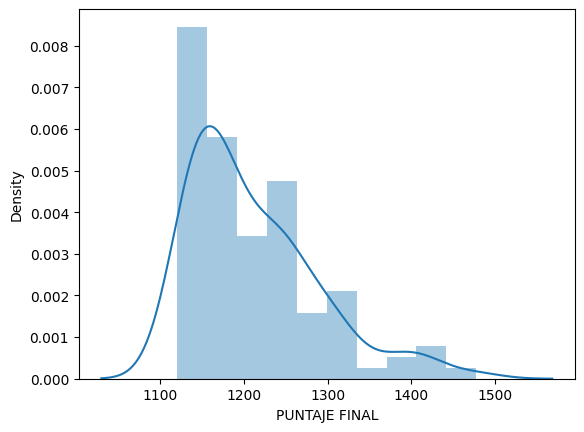

In [171]:
sns.distplot(df_medicina_ingresantes['PUNTAJE FINAL'], kde=True, bins=10)

In [172]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25352 entries, 855168 to 294995
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   APELLIDOS Y NOMBRES  25352 non-null  object 
 1   ESCUELA PROFESIONAL  25352 non-null  object 
 2   PUNTAJE FINAL        25352 non-null  object 
 3   MERITO E.P           25352 non-null  float64
 4   OBSERVACIÓN          25352 non-null  object 
 5   IdModalidad          25352 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


In [173]:
#hallando las 5carreras con mayor puntaje de ingreso
df_resultados.groupby(['ESCUELA PROFESIONAL'])['PUNTAJE FINAL'].mean()

TypeError: Could not convert 385.125986.0457.0269.375524.25666.0960.625808.25690.25941.75986.0862.875653.6251147.375596.125608.01060.625647.125334.125881.5609.125746.25840.6251020.625518.625789.375349.375986.0649.125680.375411.875663.75450.5953.0753.625491.375859.25860.375655.875473.625369.375711.375542.375859.25523.5521.25733.625942.875373.375991.875774.75415.625943.75334.75534.125415.625797.25606.875724.875599.5795.25393.875800.375320.625664.875713.6251019.75944.875795.875473.875795.875151.625519.5811.625606.875279.5558.3751198.375832.751019.5522.375943.75457.25745.125754.125649.375922.6251009.375620.375656.125168.0838.125995.0530.5312.25439.0943.75942.0777.5452.5599.5526.0943.75298.375727.125691.625669.375504.625726.0670.25553.625749.375801.5333.0690.25851.875597.25636.3751092.75465.751028.25507.375964.875535.875740.625672.75754.125721.5924.875520.625888.25648.0786.25478.375882.625547.375769.625605.75840.375359.5799.25584.625615.875803.75672.5615.251029.375461.25763.75784.25904.875605.75774.75882.625563.5790.5780.375600.625712.75687.375779.75364.875901.5608.0886.25731.875628.0670.25837.251176.125584.625756.125599.5775.875667.125964.875466.5335.25584.625333.875838.125692.75767.625817.0480.125753.625587.375901.5690.25753.625597.25383.5800.375584.625901.5442.375689.625615.875726.0520.375880.375690.251346.251149.625948.25853.875699.25919.5585.751008.25780.375460.375505.75901.5901.75701.5304.0779.5936.125385.375517.25626.875332.5638.375787.375690.25545.75211.625944.875549.125717.0762.6251090.75631.625520.625922.625290.25922.625604.8751122.875466.875759.5496.125648.0673.875916.125930.75986.25639.5880.375394.5331.125628.0537.0648.0588.5544.625722.8751113.875394.5869.3751007.125734.75907.375795.875510.25640.375669.125374.125386.0923.75836.375838.125774.75491.625800.375507.125605.75735.875526.01076.125886.0557.25753.625726.0748.25521.75944.875744.0591.875795.875641.75735.25732.5607.125610.25382.625543.75348.25632.5404.625659.25542.375513.0627.375880.375781.5999.5880.375542.375563.5691.875636.3751007.125690.25613.0880.375420.375506.0435.0833.875838.125774.75950.5684.0407.125669.125755.875732.5838.125626.875496.375593.625807.375722.875840.375399.0596.125362.8751114.375567.375500.125644.875903.75658.125525.75648.0916.1251048.5818.125628.0901.5698.625711.375250.25675.875340.375842.6251007.125955.25766.0525.125329.625342.375980.875550.5655.25436.751010.5584.0632.75275.5800.375896.125315.875199.25700.625449.125418.625586.875901.51049.375584.6251218.375631.0733.625626.875795.875726.01366.25327.125818.125671.375615.875399.5606.875391.625841.5951.625838.125671.375533.6251007.1251088.51040.875777.25691.375395.625953.0621.5377.875605.75859.251015.25412.5375.875772.75860.375669.125393.625295.0533.625640.375410.251044.0797.25712.5566.875466.0966.0943.751339.75533.875857.25539.25946.0608.251070.5753.875584.625922.625837.25592.75508.0735.875726.0453.0356.75539.5917.5880.375344.875711.375350.25457.875753.625922.875777.0595.25775.875644.0859.25457.875679.25843.75697.25104.01176.125705.125668.75819.25660.375821.5471.375818.375895.0620.375356.75690.25302.625902.0986.0838.125642.0457.875744.875564.625752.75922.875774.75769.625394.75866.0417.875561.751073.875667.375909.375690.25713.625405.125331.125457.875469.375564.875949.625814.1251051.875596.375438.625774.75743.75808.25440.625755.875860.375861.5635.0732.5335.8751121.75276.75922.625774.75817.0273.875583.75246.625572.5882.625521.25964.875370.75605.75415.25457.5566.875733.625749.625919.5489.375902.875273.875542.3751008.25711.375757.5880.375769.375502.625393.875650.75605.75910.5697.25585.75628.0503.5571.375459.01032.75458.375737.0452.5742.875408.5966.0617.5738.125437.875721.51248.5681.5640.625359.0437.0368.5868.5859.25986.0542.375832.75447.125838.125563.5838.125525.125692.5943.75618.375435.875737.0395.625833.875711.375383.75711.375869.375533.875889.375524.875559.5653.625342.375523.5269.625585.75654.75551.625436.75795.25513.0956.125690.25403.5935.25607.375513.875817.0802.875817.0489.125761.5479.0811.875803.75629.125457.875417.875376.375964.875524.875795.875674.75989.625964.875256.75740.375620.3751155.0648.0390.75681.751028.25763.75495.0802.875845.125530.25964.875701.75527.375745.125802.625564.875932.75968.25125.375943.75958.375821.75680.875501.25787.375824.0601.5895.01037.25584.625542.625777.25437.0902.625543.75799.25598.375473.625843.75774.75811.875773.875860.375962.0459.0471.625782.875734.75599.25592.75723.75275.25774.75753.625447.375650.25859.25669.375889.3751070.5890.5943.125911.875255.875563.5626.875587.125767.375605.75733.625731.625819.25683.75859.25753.625799.25366.25393.625661.5671.375715.0521.75733.875648.0608.0740.375368.25561.75881.5605.75849.375670.25692.5838.125584.625775.875623.75817.0310.0913.875413.625423.5511.875774.751037.25719.25539.5648.0311.125758.125646.25654.75626.875848.25267.375635.875334.125378.125922.625859.25976.125838.125654.75279.25589.375584.8751126.25597.25562.625678.375374.75926.0838.125563.5648.0623.75327.125314.75922.625541.75584.625310.0558.125593.625484.625579.5775.875497.0670.75669.375711.375352.25713.625605.75690.25273.0797.0350.25732.5643.75690.25589.625754.75738.125821.5501.25584.625601.5500.125409.375642.875671.375409.875915.0496.125826.25801.51087.375659.25851.625763.75882.625736.125413.875665.125275.0943.75795.875972.75901.5678.375822.625362.375986.0792.751095.0292.75358.125660.625974.125382.875737.0542.375860.375566.0901.5816.375715.875648.0759.25225.5626.0484.25793.875957.25647.125343.125600.375457.875436.125627.375198.125524.625903.75627.3751028.25775.875584.625471.375564.625592.75646.0944.875787.125464.625588.5564.625795.875445.125575.0912.75648.0606.51029.375589.125757.0648.0470.5564.625436.75537.0663.75511.375249.125506.25643.751206.5537.0636.125677.0544.625576.125670.25881.5433.875544.625652.5839.25564.0402.375505.75842.875780.375797.0648.0658.375759.5373.375795.875958.375859.25835.0377.875738.125867.125737.25777.0690.25798.125608.5820.375523.5922.625437.875552.75419.25247.375626.8751035.0442.625492.5669.625648.0740.625840.375774.75741.75428.75711.375690.25260.625394.5839.25651.375710.75521.25943.75485.125633.625719.25798.125891.875276.375468.0755.0566.25852.75630.251070.5838.125444.625796.125477.0549.625669.125648.0457.875879.75544.875690.25698.125399.25904.875548.25645.125261.5682.0488.0859.25646.5519.25680.625791.625589.125626.875529.125454.75498.375397.875484.625519.75774.75738.125310.0712.5691.375690.25795.875563.5580.625501.25737.0595.0712.5542.375475.875258.625639.25901.5446.25656.125376.125436.75686.25548.0342.375513.875862.875668.25892.75435.25805.1251099.5500.125543.5690.25654.125926.25529.625767.375671.625727.125943.75842.0615.01129.625430.75846.25521.25534.75967.125318.625795.875782.6251153.0777.0481.25844.875669.125864.875758.125479.5373.375721.5851.625877.25670.25499.5582.875331.625544.0584.6251056.125571.375690.25452.751012.75817.0833.875719.75261.5780.375418.375586.0349.125559.25544.875986.0887.375456.125690.251133.875669.125415.6251331.875670.25778.125926.25648.0475.0488.25653.01070.51049.375690.75617.0864.25584.625774.75685.3751028.25522.625415.625626.5480.375987.125852.75265.125348.0411.375817.0649.375629.125953.875641.75591.625797.0424.875677.251154.125675.875659.25588.0535.25588.25553.625524.625183.25681.75369.375880.375581.75733.625401.75788.5849.375795.875755.0415.625438.375476.125526.25993.875295.875526.875774.75732.5944.875635.875493.8751202.875779.25733.625615.0689.375662.625560.375510.75866.25458.125659.25738.375358.3751080.625911.875710.5464.0732.5622.875806.25754.75628.0493.625418.125695.0714.75526.875795.875841.75646.01033.875502.625653.625833.875662.875953.875521.25687.375590.25459.5753.625584.625439.0732.5889.625800.625594.75612.5735.0621.75322.875836.125817.01029.3751028.51022.875764.0700.375853.01008.5578.125792.75765.125631.375884.875636.375633.875975.251028.25830.51077.25439.5833.01135.0481.75558.375692.5520.625667.125656.375568.25669.125609.125502.625821.5496.125700.625774.75732.75675.25884.875554.75650.75468.0959.75712.75373.8751112.75986.0612.5817.0381.25413.875726.0451.625631.625766.0408.5437.875732.5902.625528.25946.0426.875715.875817.0562.875922.6251029.375569.1251112.75882.6251097.25989.375584.625716.1251091.625386.875440.625601.75911.875815.0470.5864.875500.125774.75734.75842.875714.75775.875893.8751112.75231.875838.125491.6251028.25839.25670.25648.0337.25250.5489.625606.0439.5563.5640.625510.5838.375506.01051.625670.25535.25913.875831.625740.625595.0677.5395.625569.375589.625516.125401.25820.625739.25574.751071.625282.375841.5817.0542.3751118.625195.0486.0826.0677.0607.3751074.125718.375734.75374.5655.0559.5906.0429.375297.0584.625285.125650.25647.375828.5626.875436.75704.25795.875567.125658.125500.625529.625230.51049.375501.5965.375186.625589.625708.25901.5472.75298.625606.875779.75734.75880.375542.375669.1251049.375288.25435.0711.375191.625911.625690.25711.625633.625669.125599.5585.75775.875815.0605.75859.25838.125469.125715.875691.375418.125389.375495.25838.1251197.25468.0509.125413.625244.0236.375727.375868.25859.25675.875880.875628.0443.5403.5757.251070.5818.375670.25483.75267.125732.5394.5600.375704.0859.25436.75880.375648.0630.25903.75620.375611.375605.75423.5669.125381.75742.625798.125628.25711.3751091.625613.625606.875656.125762.875778.125684.875838.125597.0859.25304.0565.75503.5382.375590.75753.0798.125537.5901.5546.875662.875715.0457.875882.625506.0903.75626.25508.25714.75849.375529.875802.875284.01072.75656.125817.0522.875415.625649.625500.125309.125882.625550.25691.625500.625891.625838.125459.0986.0626.875538.375559.5586.875817.0675.25774.75842.625952.75517.251050.5562.875774.75846.0524.625436.75669.125650.5818.125667.125459.0778.125655.875807.125733.625542.375733.625859.25697.25585.75471.625573.625774.75584.625432.5594.75575.0921.75957.25818.125901.5333.875530.75987.125775.875713.625411.875503.125442.375815.0808.25861.5519.5842.6251133.875500.125652.75690.5832.75495.0633.875373.375500.125635.875711.375443.5358.375757.25893.875871.62577.75548.5929.375944.875859.51042.875971.625427.125934.125399.25452.75424.625968.5848.5689.625692.5704.875866.0967.3751070.5690.75891.875768.5700.625646.25584.6251030.5605.75543.75722.625523.75753.625673.625889.3751113.875732.5573.625479.0436.75586.875418.375439.01031.625251.8751000.875204.375664.0439.75491.625844.25880.375849.625318.625868.5732.5412.5758.375648.0500.125958.625479.0759.5732.5727.375719.25546.875197.0452.5436.75479.0443.751101.75859.25686.25901.5455.0680.625378.125859.25838.125774.75790.5753.625508.0986.0710.75498.375208.25517.5669.125858.375922.625357.5901.5991.625548.25902.625419.01070.5570.5331.125784.875498.125755.875733.625922.625731.625817.0799.5584.625838.125421.5571.3751176.125555.0571.625526.0795.875310.01239.5578.125610.25424.625638.125535.875877.251028.5558.125801.5996.375827.375527.375552.75287.375659.25605.125537.25378.375690.25882.625691.375736.125587.3751197.25988.25923.75457.875652.5887.125513.625430.5666.0604.875440.125729.625521.25628.0566.01165.125779.25542.375656.125848.25668.25886.0415.625924.875456.125611.625659.5584.625338.375462.875810.5902.625523.5380.625628.01105.125676.125503.5681.75830.751050.5522.875915.0621.5701.751112.75572.75827.125524.875594.125692.51070.5797.0883.75882.875924.875895.0436.75210.25543.75626.875543.5466.875429.375787.125775.25470.5605.75626.875901.5500.125773.875542.875755.875511.875501.5327.125410.25600.375677.0693.625786.25648.0452.75584.625818.125461.251007.125708.25820.375521.75832.75655.0586.875848.5542.375775.875539.25735.875657.5486.875385.375753.625423.75439.0612.75669.625517.5392.75396.125774.75584.625732.75513.625412.5755.875531.625488.25553.0619.75543.75432.75793.875806.25394.5710.75638.375605.75580.625596.125527.125697.5626.875644.875753.625545.75415.625775.875522.375512.5688.5908.25431.625648.25394.5504.625480.625608.0712.5607.375522.375648.0690.25987.125817.0482.375758.125605.75432.5429.375700.375838.1251030.5652.5588.0732.5366.5595.0666.25980.875769.375500.125859.25671.375844.0746.25947.625680.875987.125758.625463.125648.0635.01112.75Art. 71º ReglamentoArt. 71º Reglamento982.875457.8751112.75938.375821.5817.0753.625699.75543.5521.25775.875681.75402.3751227.375521.25987.125750.5734.75359.5582.875677.25902.8751051.875800.625833.0438.125799.5691.625Art. 71º ReglamentoArt. 71º Reglamento649.375874.125756.125690.75869.625297.5375.875744.0695.25764.25669.625492.75Art. 71º ReglamentoArt. 71º Reglamento605.375735.0543.75558.375651.625353.875254.75361.75573.0417.0409.375269.125333.375252.25593.0717.0769.625880.375712.5530.51028.25480.125747.125670.25168.25437.875847.375 to numeric